# Movie Reviews Automated Sentiment Classification

-----

## Overview

### Description

<div style="color: #196CC4;">
This project involves developing an automated system to filter and categorize movie reviews as positive or negative. Using a dataset of IMDb movie reviews with predefined labels, a machine learning model will be trained to automatically detect positive and negative reviews.
</div>


### Objective

<div style="color: #196CC4;">
The main goal is to implement a system that achieves an F1 score of at least 0.85 in classifying reviews as positive or negative, through the training and evaluation of machine learning models that can accurately classify the content of the review text. This will automate and optimize the sentiment analysis process in the specific context of movie reviews, providing a useful tool for the film enthusiast community.
</div>


### Resources

<div style="color: #196CC4;">
<b>Features</b><br>
▶ tconst - Unique identifier for each movie title<br>
▶ title_type - Type of title, such as 'movie' or 'short', indicating the category of the title<br>
▶ primary_title - Main title of the movie<br>
▶ original_title - Original title of the movie, in the original language if different from the primary title<br>
▶ start_year - Release year of the movie<br>
▶ end_year - End year of the movie (typically "\N" indicates no information available)<br>
▶ runtime_minutes - Duration in minutes of the movie<br>
▶ is_adult - Indicator of whether the movie is for adults (1) or not (0)<br>
▶ genres - Genres of the movie<br>
▶ average_rating - Average rating of the movie<br>
▶ votes - Number of votes received for the movie<br>
▶ review - Text of the movie review<br>
▶ rating - Classification of the review (neg for negative, pos for positive)<br>
▶ sp - Maybe an abbreviation or specific code related to the review classification?<br>
▶ ds_part - Indicator of whether the observation belongs to the training dataset ('train') or test dataset ('test')<br>
▶ idx - Unique index identifier for each observation. ![image.png](attachment:image.png)<br>

<b>Objective</b><br>
▶ pos - Indicator of whether the review is positive (1) or negative (0)<br>
</div>


### Methodology

<div style="color: #196CC4;">
<ol>
<li>Initialization and Exploratory Data Analysis
<ul>
<li>Import libraries, modules, and the dataset: imdb_reviews.tsv</li>
<li>Perform initial exploratory data analysis, including correlations, missing values, duplicates, and syntax.</li>
<li>Clean the dataset: unify column names, handle missing values, and adjust data types.</li>
<li>Exploratory Data Analysis
<ul>
<li>Calculate descriptive statistics.</li>
<li>Remove rows with missing values.</li>
<li>Simplify the dataset by removing irrelevant columns.</li>
<li>Analyze the distribution of reviews per movie.</li>
<li>Visualize data distribution with KDE plots.</li>
<li>Analyze class balance (positive/negative).</li>
<li>Compare the distribution of ratings in the training and test sets.</li>
<li>Analyze the evolution of positive and negative reviews over time.</li>
</ul>
</li>
</ul>
</li>

<li>Data Preparation
<ul>
<li>Create a function to evaluate model performance.</li>
<li>Normalize text: lowercase, remove digits and punctuation.</li>
<li>Split the dataset into training and test sets.</li>
</ul>
</li>

<li>Sentiment Analysis with Models
<ul>
<li>Use a DummyClassifier as a baseline.</li>
<li>Model 1: NLTK + TF-IDF + Logistic Regression.</li>
<li>Model 2: SpaCy + TF-IDF + Logistic Regression.</li>
<li>Model 3: SpaCy + TF-IDF + LightGBM.</li>
<li>Model 4: SpaCy + TF-IDF + Random Forest.</li>
<li>Model 5: SpaCy + TF-IDF + Grid Search.</li>
</ul>
</li>

<li>Model Evaluation
<ul>
<li>Compare performance metrics of all models (Accuracy, F1-Score, ROC AUC).</li>
</ul>
</li>

<li>Sentiment Analysis with New Reviews
<ul>
<li>Use a new set of reviews to evaluate trained models.</li>
<li>Select diverse reviews.</li>
<li>Apply normalization function to new reviews.</li>
<li>Evaluate all models with new reviews.</li>
<li>Perform a final analysis of the results.</li>
</ul>
</li>

<li>Conclusions
<ul>
<li>Analyze model results.</li>
<li>Compare performance metrics.</li>
<li>Select the best model and summarize results.</li>
</ul>
</li>
</ol>
</div>

-----

## General Information

### Inicialization

<div style="color: #196CC4;">
▶ Importing libraries and loading data
</div>


In [1]:
# Data analysis
import pandas as pd

# Numerical operations
import numpy as np

# Data visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Attractive data visualization
import seaborn as sns   

# Maths
import math

# Metrics
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Converting textual data into numerical features
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Progress bar
from tqdm.auto import tqdm

# Regular expressions
import re

# Strings
import string

# Natural Language Processing (NLP)
import nltk
import spacy 

# Stopwords
from nltk.corpus import stopwords

# Models
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

<div style="color: #196CC4;">
The following shows the graph visualization environment:<br>
    
▶ <b>%matplotlib inline:</b> enables the display of matplotlib graphs directly within the Jupyter notebook, rather than opening a separate pop-up window.<br>
▶ <b>%config InlineBackend.figure_format = 'png':</b> configures the format of figures generated by matplotlib, rendering in PNG format.<br>
▶ <b>plt.style.use('seaborn'):</b> sets the style of the graphs generated to 'seaborn', which is a more modern and appealing visualization style compared to the default matplotlib styles.
</div>


In [2]:
# Inline data visualization
%matplotlib inline

# PNG visualization
%config InlineBackend.figure_format = 'png'

# Better quality for HiDPI
# %config InlineBackend.figure_format = 'retina'

# Modern visualization
plt.style.use('seaborn-v0_8')

<div style="color: #196CC4;">
The following shows time and resource monitoring for completing complex operations on large datasets.<br>
    
▶ <b>Usage of tqdm:</b> visual progress bar during long iterations or performing operations that may take a lot of time.<br>
▶ <b>progress_apply in Pandas:</b> useful for operations involving intensive data manipulation that could take a considerable amount of time.
</div>


In [3]:
# Progress bar
tqdm.pandas()

In [4]:
# Import data
df_reviews = pd.read_csv('datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

# *Data provided by Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. 

### Dataset Deployment


<div style="color: #196CC4;">
▶ General properties of the DataFrame
</div>


In [5]:
# General Dataframe properties
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

<div style="color: #196CC4;">
▶ General overview of the DataFrame
</div>


In [6]:
display(df_reviews.head(10))

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281
5,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,This is the first movie I've seen from Singapo...,9,pos,1,test,9282
6,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Yes non-Singaporean's can't see what's the big...,9,pos,1,test,9283
7,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240,This true story of Carlson's Raiders is more o...,2,neg,0,train,9903
8,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240,Should have been titled 'Balderdash!' Little i...,2,neg,0,train,9905
9,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240,The movie 'Gung Ho!': The Story of Carlson's M...,4,neg,0,train,9904


<div style="color: #196CC4;">
▶ Descriptive statistics for numerical data.
</div>


In [7]:
# Descriptive statistics
df_reviews.describe()

,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47331.000000,47331.000000,47329.000000,47329.0,47331.000000,47331.000000,47331.000000
mean,1989.631235,0.001732,5.998278,25562.917323,5.484608,0.498954,6279.697999
std,19.600364,0.041587,1.494289,83670.039163,3.473109,0.500004,3605.702545
min,1894.000000,0.000000,1.400000,9.0,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,827.0,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3197.0,4.000000,0.000000,6299.000000
75%,2004.000000,0.000000,7.100000,13974.0,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1739448.0,10.000000,1.000000,12499.000000


<div style="color: #196CC4;">
▶ Checking for duplicate values.
</div>


In [8]:
# Duplicated values
review_duplicates = df_reviews.duplicated()

# Sum of duplicated values
total_review_duplicates = review_duplicates.sum()

# Duplicated rows
review_duplicates_rows = df_reviews[review_duplicates]

# Display data
print("Total number of duplicate rows:")

print(total_review_duplicates)

Total number of duplicate rows:
0


In [9]:
# Identify duplicates
duplicates_reviews = df_reviews.duplicated(subset=['review'])

# Sum
num_duplicates_reviews = duplicates_reviews.sum()

# Print
print(f"Number of duplicate entries in 'review': {num_duplicates_reviews}")

Number of duplicate entries in 'review': 91


<div style="color: #196CC4;">
▶ We know that the 'tconst' series is the unique identifier for each movie title, so across the 47,331 records, rows, or reviews in this DataFrame, we can identify the total number of productions being rated.
</div>


In [10]:
# Unique values
num_unique_tconst = df_reviews['tconst'].nunique()
print(f"Number of unique values (tconst) or total number of movies: {
      num_unique_tconst}")

Number of unique values (tconst) or total number of movies: 6648


### Initial Observations

<div style="color: #196CC4;">
<p>▶ The series names are in lowercase, which helps manage the data correctly.<br>
▶ There are no duplicate rows.<br>
▶ There are 91 duplicate values in the "reviews" series.<br>
▶ There are missing values in "average_rating" and "votes".<br>
▶ According to the descriptive statistics, there are no pronounced discrepancies or outliers in the minimum, maximum, or average values.<br>
<br>
▶ Series that do not influence the purpose of this project, as they are not critical to sentiment analysis and do not directly affect the classification of reviews:<br>
</p>
<ul>
<li>title_type: Type of title, such as 'movie' or 'short', indicating the category of the title</li>
<li>primary_title: Main title of the movie</li>
<li>original_title: Original title of the movie, in the original language if different from the main title</li>
<li>start_year: Year of release of the movie</li>
<li>end_year: Year of completion of the movie</li>
<li>runtime_minutes: Duration in minutes of the movie</li>
<li>is_adult: Indicator of whether the movie is for adults (1) or not (0)</li>
<li>rating: Review rating (neg for negative, pos for positive)</li>
<li>sp: Maybe an abbreviation or code related to the review classification</li>
<li>idx: Unique index identifier for each observation.</li>
</ul>
<p>
</p>
</div>

-----

## Exploratory Data Analysis (EDA)

### Data Cleaning

<div style="color: #196CC4;">
▶ The following rows with missing values for "average_rating" and "votes" are removed (only 2).
</div>

In [11]:
# Delete rows with NaN
df_reviews = df_reviews.dropna(subset=['average_rating', 'votes'])

<div style="color: #196CC4;">
▶ The following rows with duplicate values in "review" are removed.
</div>

In [12]:
# Delete rows with 'reviews' duplicates
df_reviews.drop_duplicates(subset=['review'], inplace=True)

### Number of reviews per movie

<div style="color: #196CC4;">
▶ The first bar chart shows how many movies have exactly each number of reviews. For example, it shows how many movies have 1 review, how many have 2 reviews, how many have 3 reviews, and so on. This is to understand the most common number of reviews that movies receive in the dataset.<br>
▶ The second Kernel Density Estimate (KDE) plot represents the data distribution as a smoothed probability density function. This is to identify trends or clusters in the distribution of the number of reviews.
</div>

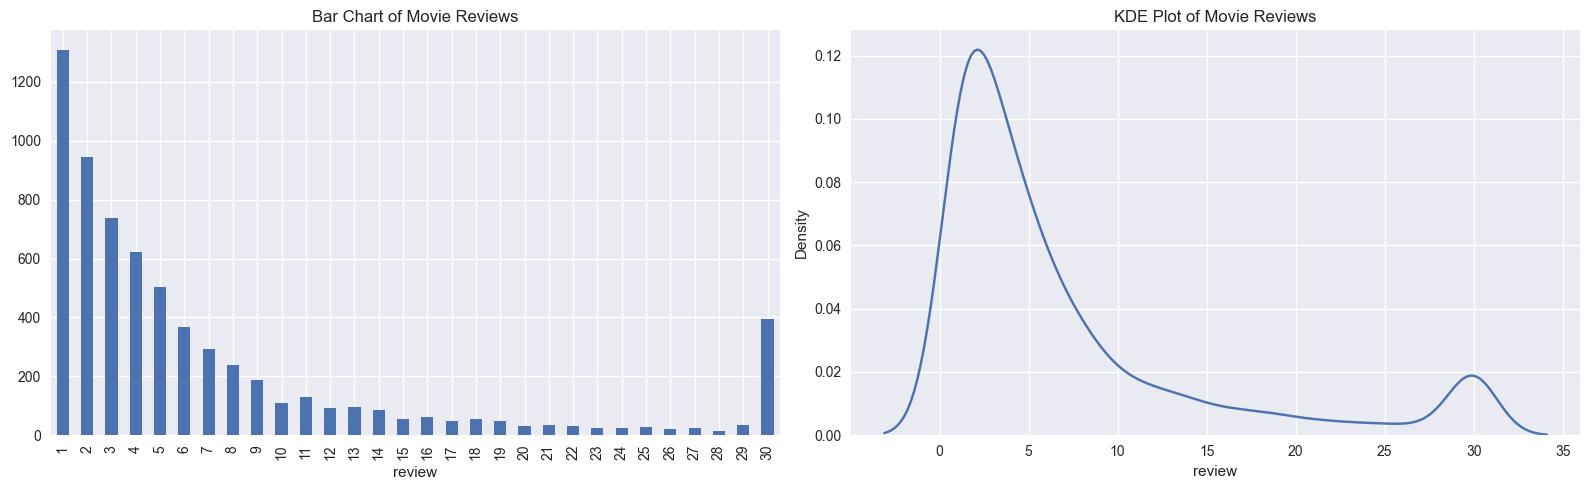

In [13]:
# Plot creation (2 rows, 1 column)
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Subplot 1: Bar plot 
ax = axs[0]
# Group by 'tconst', count the number of reviews per movie, then count how many movies have the same number of reviews
dft = df_reviews.groupby('tconst')['review'].count().value_counts().sort_index()
# Create bar plot
dft.plot.bar(ax=ax)
# Title
ax.set_title('Bar Chart of Movie Reviews')

# Subplot 2: KDE plot
ax = axs[1]
# Number of reviews per movie by grouping by 'tconst'
dft = df_reviews.groupby('tconst')['review'].count()
# Create kernel density estimate (KDE)
sns.kdeplot(dft, ax=ax)
# Title
ax.set_title('KDE Plot of Movie Reviews')

# Adjust subplot
fig.tight_layout()

### Class Balance


<div style="color: #196CC4;">
▶ The following shows the class distribution in the dataset, providing quantitative information about the frequency of each label in the 'pos' column, which is essential for understanding the data distribution and for the proper preparation of the analysis or data model.</div>


In [14]:
# Value count
pos_value_counts = df_reviews['pos'].value_counts()
pos_value_counts

pos
0    23680
1    23558
Name: count, dtype: int64

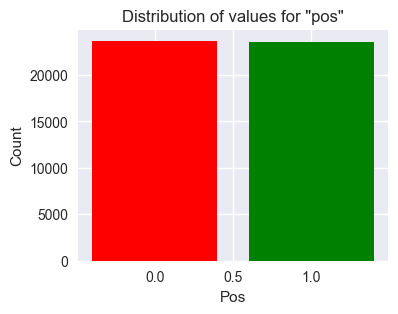

In [15]:
# Plot size
plt.figure(figsize=(4, 3)) 

# Bars definition
bars = plt.bar(pos_value_counts.index, pos_value_counts.values, color=['red', 'green'])

# Labels
plt.title('Distribution of values for "pos"')
plt.xlabel('Pos')
plt.ylabel('Count')


# Print
plt.show()

<div style="color: #196CC4;">
▶ Given that the class distribution is fairly balanced with 23,715 records for class 0 and 23,616 records for class 1, it is not necessary to address the class imbalance problem in this project.
</div>


### Distribution of Ratings (Test / Train)

<div style="color: #196CC4;">
▶ The following shows the distribution of ratings within different training and test subsets used in the analysis of this project.</div>


In [16]:
# Training data
dft_train = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft_train = dft_train.reindex(index=np.arange(min(dft_train.index.min(), 1), max(dft_train.index.max(), 11))).fillna(0)

# Test data
dft_test = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft_test = dft_test.reindex(index=np.arange(min(dft_test.index.min(), 1), max(dft_test.index.max(), 11))).fillna(0)

# DataFrame
df_table = pd.DataFrame({
    'Rating': np.arange(1, 11),
    'Train Count': dft_train.values,
    'Test Count': dft_test.values
})

# Print
print(df_table)

   Rating  Train Count  Test Count
0       1       4856.0      4718.0
1       2       2154.0      2181.0
2       3       2314.0      2388.0
3       4       2571.0      2498.0
4       5          0.0         0.0
5       6          0.0         0.0
6       7       2390.0      2197.0
7       8       2874.0      2692.0
8       9       2145.0      2187.0
9      10       4453.0      4620.0


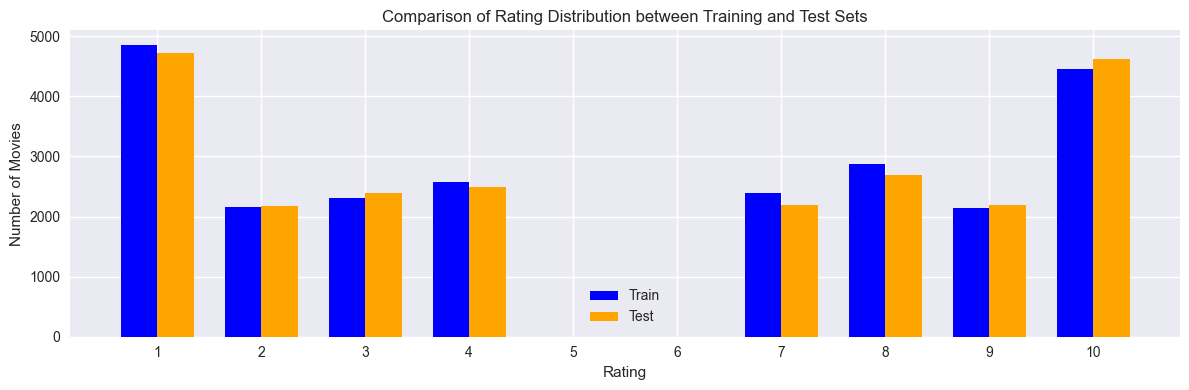

In [17]:
# Figure
fig, ax = plt.subplots(figsize=(12, 4))

# Width
bar_width = 0.35

# Positions for train and test bars
r1 = np.arange(len(df_table))
r2 = [x + bar_width for x in r1]

# Bars
ax.bar(r1, df_table['Train Count'], color='blue', width=bar_width, label='Train')
ax.bar(r2, df_table['Test Count'], color='orange', width=bar_width, label='Test')

# Tags
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Movies')
ax.set_title('Comparison of Rating Distribution between Training and Test Sets')

ax.set_xticks(r1 + bar_width / 2)
ax.set_xticklabels(df_table['Rating'])

# Legends
ax.legend()

# Plot
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
▶ It is observed that there is a similar distribution between the training and test sets for most ratings, so there are no significant differences in the number of movies with certain ratings between the two sets. This also helps validate the consistency of rating distributions between the training and test sets.<br>
▶ There are no movies with ratings of 5 and 6 in the dataset for either of the two sets.
</div>


### Distribution of Reviews (-, +)

<div style="color: #196CC4;">
▶ Let's look at the number of movies and reviews over the years.
</div>


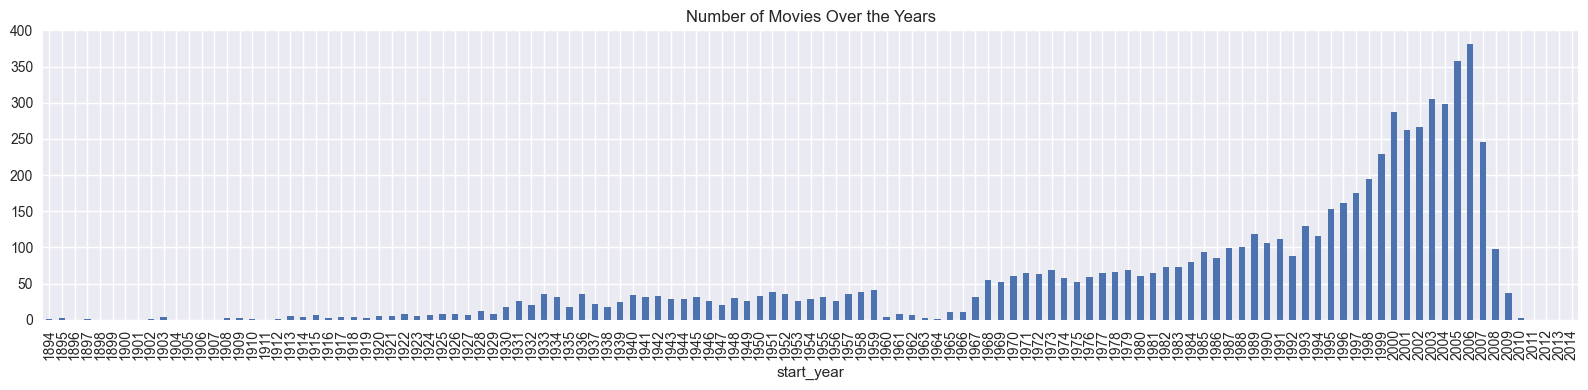

In [18]:
# Plot creation (1 row, 1 column)
fig, ax = plt.subplots(1, 1, figsize=(16, 4))

# Count unique movies per year
dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates()['start_year'].value_counts().sort_index()

# All years from the minimum to 2015 | Fill missing years with 0
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2015))).fillna(0)

# Bar Plot & Title
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over the Years')


# Adjust subplot
fig.tight_layout()

# Print
plt.show()

<div style="color: #196CC4;">
▶ Now let's look at the distribution of negative and positive reviews over the years for two parts of the dataset (training and testing)
</div>


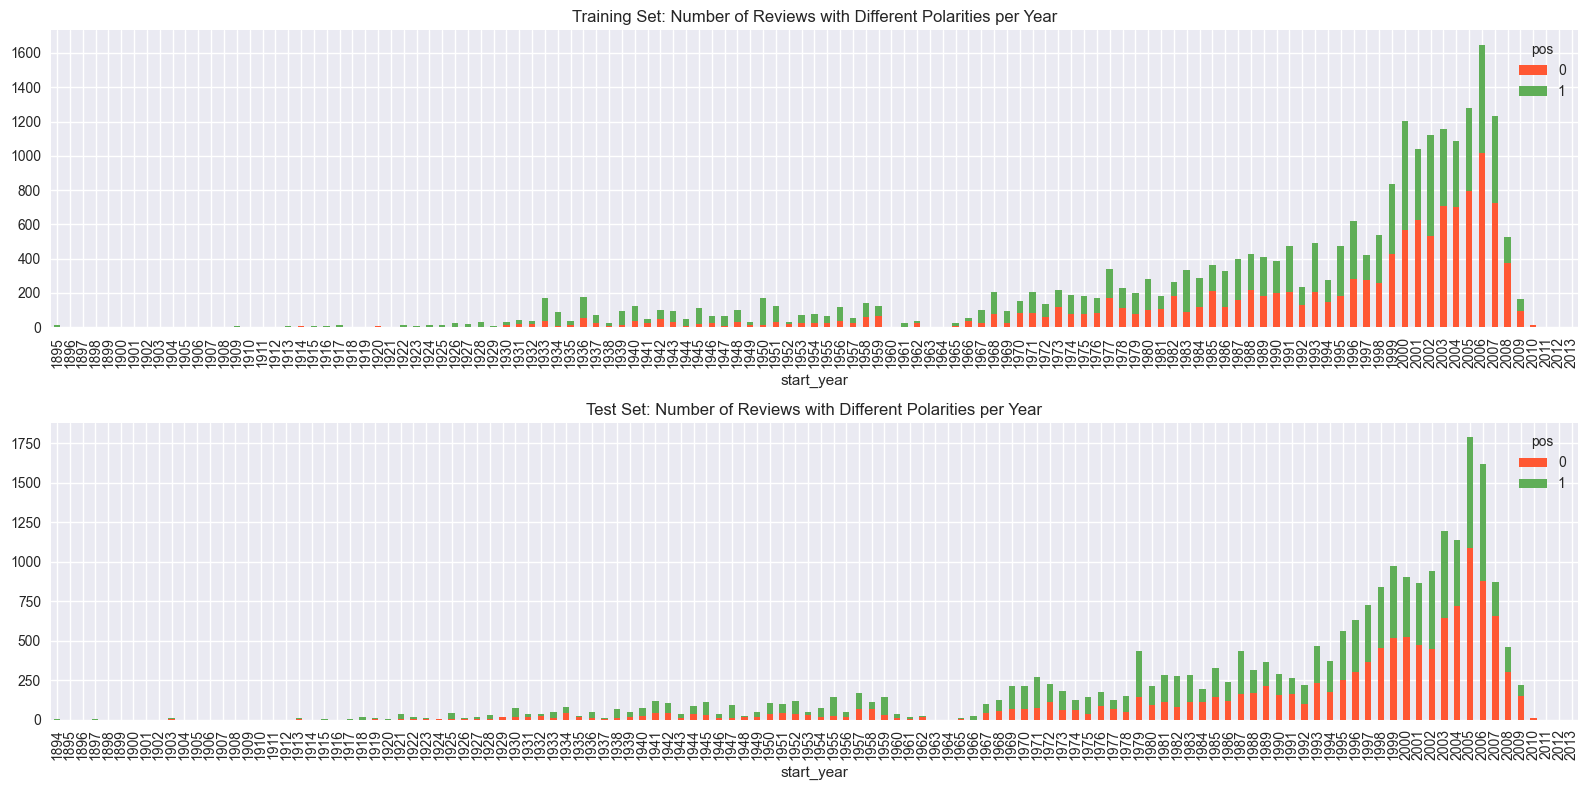

In [19]:
# # Plot creation (2 rows, 1 column)
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

# -------------------------------------------

# Subplot 1 (Train)
ax = axs[0]

# Group by 'start_year' and 'pos' | Count reviews | Unstack 'pos'
dft_train = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()

# Convert index to int
dft_train.index = dft_train.index.astype('int')

# Reindex to fill missing years | Fill NaN values with 0
dft_train = dft_train.reindex(index=np.arange(dft_train.index.min(), max(dft_train.index.max(), 2014))).fillna(0)

# Bar Plot & Title
dft_train.plot(kind='bar', stacked=True, ax=ax, color=['#FF5733', '#5FAE57'])
ax.set_title(
    'Training Set: Number of Reviews with Different Polarities per Year')


# -------------------------------------------

# Subplot 2 (Test)
ax = axs[1]

# Group by 'start_year' and 'pos' | Count reviews | Unstack 'pos'
dft_test = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()

# Convert index to int
dft_test.index = dft_test.index.astype('int')

# Reindex to fill missing years | Fill NaN values with 0
dft_test = dft_test.reindex(index=np.arange(dft_test.index.min(), max(dft_test.index.max(), 2014))).fillna(0)

# Bar Plot & Title
dft_test.plot(kind='bar', stacked=True, ax=ax, color=['#FF5733', '#5FAE57'])
ax.set_title('Test Set: Number of Reviews with Different Polarities per Year')


# -------------------------------------------

# Adjust subplot
fig.tight_layout()

# Print
plt.show()

### KDE Distribution

<div style="color: #196CC4;">
▶ This visualization helps understand the distribution of reviews based on their polarity (positive or negative) across different datasets divided by year and by movie.<br>
▶ Both the top graph (training set) and the bottom graph (test set) show a lot of similarity and consistency in the distribution of reviews over the years and also in terms of their polarity.
</div>



Distribution of reviews by movie



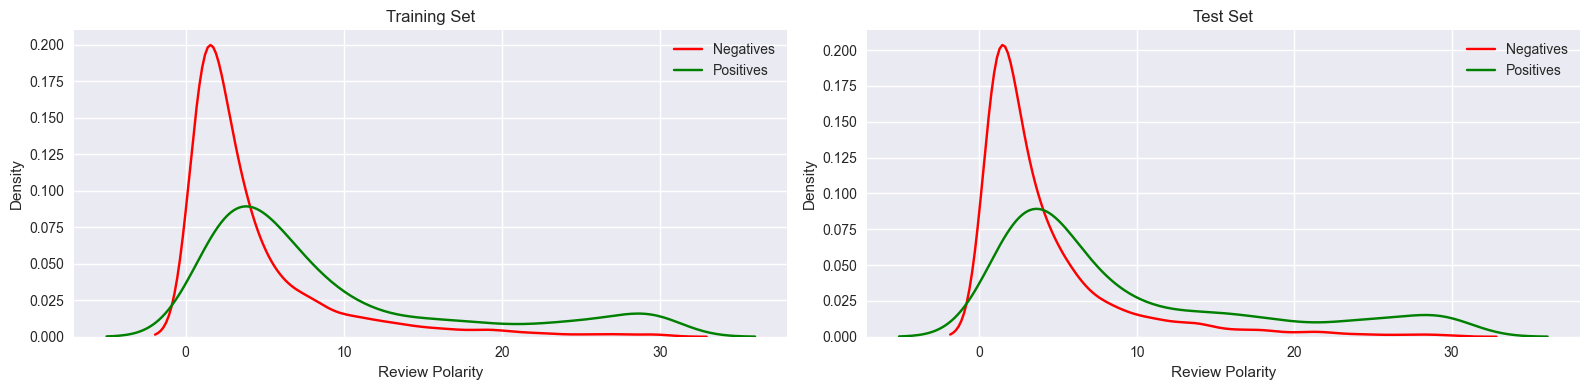

In [20]:
print()
print("Distribution of reviews by movie")

print()

# -------------------------------------------

# Plot creation (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

# -------------------------------------------

# Subplot 1
ax = axs[0]

# Count reviews | Unstack and separate columns for 'neg' and 'pos'
dft_train = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()

# Plot KDE plot using Seaborn (default Gaussian kernel)
sns.kdeplot(dft_train[0], color='red', label='Negatives', ax=ax)
sns.kdeplot(dft_train[1], color='green', label='Positives', ax=ax)

# Legends and Title
ax.legend()
ax.set_title('Training Set')

# Labels
ax.set_xlabel('Review Polarity')
ax.set_ylabel('Density')


# -------------------------------------------

# Subplot 2
ax = axs[1]

# Count reviews | Unstack and separate columns for 'neg' and 'pos'
dft_test = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()

# Plot KDE plot using Seaborn (default Gaussian kernel)
sns.kdeplot(dft_test[0], color='red', label='Negatives', ax=ax)
sns.kdeplot(dft_test[1], color='green', label='Positives', ax=ax)

# Legends and Title
ax.legend()
ax.set_title('Test Set')

# Labels
ax.set_xlabel('Review Polarity')
ax.set_ylabel('Density')


# -------------------------------------------

# Adjust subplot
fig.tight_layout()

# Print
plt.show()

<div style="color: #196CC4;">
▶ These KDE plots of negative and positive reviews by movie in different datasets (training and test) facilitate visual comparison between the distributions. <br>
▶ Clear similarities are observed in the distribution of polarities between the two datasets (training and test), with data concentrations (reviews) between values 1 and 5, with negative reviews predominating over positive ones.
</div>


### Simplification of Datasets

<div style="color: #196CC4;">
▶ The following series that do not influence the purpose of the project are removed.
</div>


In [21]:
# List of series
columns_to_drop = ['genres', 'tconst', 'title_type', 'primary_title', 'original_title', 'start_year', 
                   'end_year', 'runtime_minutes', 'is_adult', 'rating', 'sp', 'idx']

# Copy DataFrame
df_simplified = df_reviews.copy()

# Drop
df_simplified.drop(columns=columns_to_drop, inplace=True)

# Verify columns
print(df_simplified.columns)


Index(['average_rating', 'votes', 'review', 'pos', 'ds_part'], dtype='object')


<div style="color: #196CC4;">
▶ The details of the original DataFrame and then the simplified DataFrame are shown.
</div>


In [22]:
# Original DataFrame properties
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47238 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47238 non-null  object 
 1   title_type       47238 non-null  object 
 2   primary_title    47238 non-null  object 
 3   original_title   47238 non-null  object 
 4   start_year       47238 non-null  int64  
 5   end_year         47238 non-null  object 
 6   runtime_minutes  47238 non-null  object 
 7   is_adult         47238 non-null  int64  
 8   genres           47238 non-null  object 
 9   average_rating   47238 non-null  float64
 10  votes            47238 non-null  Int64  
 11  review           47238 non-null  object 
 12  rating           47238 non-null  int64  
 13  sp               47238 non-null  object 
 14  pos              47238 non-null  int64  
 15  ds_part          47238 non-null  object 
 16  idx              47238 non-null  int64  
dtypes: Int64(1), floa

<div style="color: #196CC4;">
▶ The simplified DataFrame will help streamline the training phase.
</div>


In [23]:
# Simplified DataFrame properties
df_simplified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47238 entries, 0 to 47330
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   average_rating  47238 non-null  float64
 1   votes           47238 non-null  Int64  
 2   review          47238 non-null  object 
 3   pos             47238 non-null  int64  
 4   ds_part         47238 non-null  object 
dtypes: Int64(1), float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [24]:
df_simplified

,average_rating,votes,review,pos,ds_part
0,6.3,2218,The pakage implies that Warren Beatty and Gold...,0,train
1,6.3,2218,How the hell did they get this made?! Presenti...,0,train
2,6.3,184,There is no real story the film seems more lik...,0,test
3,6.3,184,Um .... a serious film about troubled teens in...,1,test
4,6.3,184,I'm totally agree with GarryJohal from Singapo...,1,test
...,...,...,...,...,...
47326,7.7,2254,This is another of my favorite Columbos. It sp...,1,test
47327,7.3,278,Talk about being boring! I got this expecting ...,0,test
47328,7.3,278,"I never thought I'd say this about a biopic, b...",1,test
47329,7.3,278,Spirit and Chaos is an artistic biopic of Miya...,1,test


-----

## Data Preparation


### Evaluation Procedure


<div style="color: #196CC4;">
▶ The following shows the function to evaluate the performance of the models that will be used in this project
</div>


In [25]:
# Metrics function
def evaluate_model(model, train_features, train_target, test_features, test_target):

    # Inicializer
    eval_stats = {}

    # Predictions
    train_pred = model.predict(train_features)
    test_pred = model.predict(test_features)

    # -------------------------------------------   
    
    # Probabilities for ROC AUC
    
    # Check if it's a LightGBM model
    if isinstance(model, lgb.Booster):  
        # Predictions to probabilities (decision threshold)
        train_proba = (train_pred > 0.5).astype(int)
        test_proba = (test_pred > 0.5).astype(int)
        
        # Predicted probabilities to integers
        train_pred = np.round(train_pred).astype(int)  
        test_pred = np.round(test_pred).astype(int)  
    else:
        # Use predict_proba for other models if needed
        train_proba = model.predict_proba(train_features)[:, 1]
        test_proba = model.predict_proba(test_features)[:, 1]

    # Metrics 'train'
    eval_stats['train'] = {
        'Accuracy': accuracy_score(train_target, train_pred),
        'F1': f1_score(train_target, train_pred),
        'ROC AUC': roc_auc_score(train_target, train_proba)
    }
    
    # Metrics 'test'
    eval_stats['test'] = {
        'Accuracy': accuracy_score(test_target, test_pred),
        'F1': f1_score(test_target, test_pred),
        'ROC AUC': roc_auc_score(test_target, test_proba)
    }
    
    # -------------------------------------------
    
    # Create DataFrame from eval_stats
    df_eval_stats = pd.DataFrame(eval_stats)

    # Round values
    df_eval_stats = df_eval_stats.round(4)

    # Rename columns
    df_eval_stats = df_eval_stats.rename(columns={'train': 'Train', 'test': 'Test'})

    # -------------------------------------------    
    
    # Print
    print(df_eval_stats)

    # Return
    return df_eval_stats

### Normalization

<div style="color: #196CC4;">
▶ We assume that all models below accept text in lowercase and without digits, punctuation, etc.
</div>


In [26]:
def preprocess_text(text):
    # Convert to lowercase and remove punctuation
    text = re.sub(r'[^\w\s]', '', text.lower())

    # Remove special characters (emoticons, emojis, etc.)
    text = re.sub(r'[^\w\s\d]', '', text)

    # Remove extra blank spaces
    text = ' '.join(text.split())

    # Tokenize and normalize (lemmatize) with spaCy
    #doc = nlp(text)
    #lemmas = [token.lemma_ for token in doc]

    # Return
    return text

<div style="color: #196CC4;">
▶ Now all reviews in the DataFrame are processed
</div>


In [27]:
# Apply preprocessing to reviews
df_simplified['review_norm'] = df_simplified['review'].apply(preprocess_text)

<div style="color: #196CC4;">
▶ Next, we check that normalization is applied properly, using the first review in the Series as an example
</div>


In [28]:
# Access the first review
first_review = df_simplified['review'].iloc[0]  

# Print review without processing
print(df_simplified['review'].iloc[0])
print()

# Preprocess
normalized_review = preprocess_text(first_review)

# Print the normalized review
print("Normalized First Review:", normalized_review)

The pakage implies that Warren Beatty and Goldie Hawn are pulling off a huge bank robbery, but that's not what I got out of it! I didn't get anything! In the first half there's a new character (without introduction) in every other scene. The first half-hour is completely incomprehensible, the rest is just one long, annoying, underlit chase scene. There's always an irritating sound in the background whether it's a loud watch ticking, a blaring siren, a train whistling, or even the horrible score by Quincy Jones. There are a lot of parts that are laughably bad, too. Like, the bad guys chasing Beatty on thin ice with a CAR! Or, the police arriving at the scene roughly fifteen times. I really hated this movie!

Normalized First Review: the pakage implies that warren beatty and goldie hawn are pulling off a huge bank robbery but thats not what i got out of it i didnt get anything in the first half theres a new character without introduction in every other scene the first halfhour is complet

### Training / Testing Data Split

<div style="color: #196CC4;">
▶ Fortunately, the entire dataset is already split into training/testing parts; 'ds_part' is the corresponding indicator.</div>

In [29]:
# Filter for training data
df_reviews_train = df_simplified.query('ds_part == "train"').copy()
df_reviews_train['review_norm'] = df_reviews_train['review'].apply(preprocess_text)

# Filter for testing data
df_reviews_test = df_simplified.query('ds_part == "test"').copy()
df_reviews_test['review_norm'] = df_reviews_test['review'].apply(preprocess_text)

# Extract features (preprocessed reviews) and target variables
train_features = df_reviews_train['review_norm']
train_target = df_reviews_train['pos']

test_features = df_reviews_test['review_norm']
test_target = df_reviews_test['pos']

# Print shapes
print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23757, 6)
(23481, 6)


-----

## Sentiment Analysis with Models

### Model 0 - Constant

<div style="color: #196CC4;">
▶ <b>DummyClassifier</b> predicts the class label that appears most frequently in the training data for the target variable 'pos'. This serves as a baseline to evaluate how well your more complex models perform.
</div>

In [30]:
# DummyClassifier inicializer
dummy_clf = DummyClassifier(strategy='constant', constant=1)

# Train the model (no actual training happens for DummyClassifier)
dummy_clf.fit(train_features, train_target)

DummyClassifier(constant=1, strategy='constant')

In [31]:
# Metrics
m0_stats = evaluate_model(dummy_clf, train_features, train_target, test_features, test_target)

           Train    Test
Accuracy  0.4993  0.4981
F1        0.6660  0.6650
ROC AUC   0.5000  0.5000


### Model 1 - NLTK + TF-IDF + LR

<div style="color: #196CC4;">
Next, the text data is prepared for sentiment analysis using text preprocessing, TF-IDF vectorization, and a logistic regression model:<br>
▶ <b>NLTK</b> is a collection of tools for NLP, providing greater flexibility to build custom workflows.<br>
▶ <b>TF-IDF (Term Frequency-Inverse Document Frequency)</b> is a common technique for representing text data numerically. It considers both the frequency of a word in a document and its overall rarity across the dataset.<br>
▶ <b>Logistic Regression</b> is a machine learning algorithm used for binary classification tasks, making it suitable for sentiment analysis (positive or negative).
</div>

In [32]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dguez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
def preprocess_text_nltk(text):
    # Convert to lowercase and remove punctuation
    text = re.sub(r'[^\w\s]', '', text.lower())

    # Remove special characters (emoticons, emojis, etc.)
    text = re.sub(r'[^\w\s\d]', '', text)

    # Tokenizer(split into words)
    words = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]

    # Join words
    preprocessed_text = ' '.join(words)

    return preprocessed_text

In [34]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dguez\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
# Preprocess training and testing data
train_features_joined = [preprocess_text_nltk(text) for text in train_features]
test_features_joined = [preprocess_text_nltk(text) for text in test_features]

# TF-IDF vectorizer
vectorizer1 = TfidfVectorizer()

# Transform training and testing data into TF-IDF features
train_features_tfidf = vectorizer1.fit_transform(train_features_joined)
test_features_tfidf = vectorizer1.transform(test_features_joined)

# Logistic Regression model
model1 = LogisticRegression()

# Train
model1.fit(train_features_tfidf, train_target)

LogisticRegression()

In [36]:
# Metrics
print("Model 1 - NLTK, TF-IDF and LR:")
print()
m1_stats = evaluate_model(model1, train_features_tfidf, train_target, test_features_tfidf, test_target)



Model 1 - NLTK, TF-IDF and LR:

           Train    Test
Accuracy  0.9394  0.8853
F1        0.9398  0.8849
ROC AUC   0.9841  0.9530


### Model 2 - SpaCy + TF-IDF + LR

<div style="color: #196CC4;">
▶ Next, a sentiment analysis is performed using a <b>Logistic Regression</b> model, similar to the previous example, but with spaCy for preprocessing and <b>TF-IDF</b> vectorization:<br> 
▶ This example uses <b>spaCy</b> for preprocessing (NLP), which offers more advanced linguistic analysis compared to the NLTK tokenizer.<br>
▶ The rest of the code (TF-IDF vectorization, logistic regression, and evaluation) remains similar.
</div>

In [37]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [38]:
def preprocess_text_spacy(text):
    # Convert to lowercase and remove punctuation
    text = re.sub(r'[^\w\s]', '', text.lower())

    # Remove special characters (emoticons, emojis, etc.)
    text = re.sub(r'[^\w\s\d]', '', text)
    
    # Tokenizer SpaCy
    doc = nlp(text) 
    
    # Lowercase, remove stopwords
    words = [token.text.lower() for token in doc if not token.is_stop]  
    
    # Join words
    preprocessed_text = ' '.join(words)  
    
    # Return
    return preprocessed_text

In [39]:
# Preprocess training and testing data
train_features_joined = [preprocess_text_spacy(text) for text in train_features]
test_features_joined = [preprocess_text_spacy(text) for text in test_features]

# TF-IDF vectorizer
vectorizer2 = TfidfVectorizer()

# Transform training and testing data into TF-IDF features
train_features_tfidf = vectorizer2.fit_transform(train_features_joined)
test_features_tfidf = vectorizer2.transform(test_features_joined)

In [40]:
# Logistic Regression model
model2 = LogisticRegression()

# Train
model2.fit(train_features_tfidf, train_target)

LogisticRegression()

In [41]:
# Metrics
print("Model 2 - spaCy, TF-IDF and LR:")
print()
m2_stats = evaluate_model(model2, train_features_tfidf, train_target, test_features_tfidf, test_target)

Model 2 - spaCy, TF-IDF and LR:

           Train    Test
Accuracy  0.9394  0.8790
F1        0.9398  0.8785
ROC AUC   0.9832  0.9501


### Model 3 - SpaCy + TF-IDF + LGBM

<div style="color: #196CC4;">
▶ Next, sentiment analysis is performed using <b>LightGBM (LGBM)</b>, a machine learning model for classification tasks, to classify reviews as positive or negative based on learned feature representations.<br>  
▶ <b>LGBM</b> is based on the gradient boosting algorithm, which trains a model iteratively to gradually improve performance.<br>
▶ This example continues to use <b>spaCy</b> for preprocessing, as well as <b>TF-IDF</b> vectorization and evaluation.
</div>

In [42]:
# LightGBM model
lgb_train = lgb.Dataset(train_features_tfidf, label=train_target)
lgb_test = lgb.Dataset(test_features_tfidf)

In [43]:
# Parameters
params = {
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_child_samples': 20,
    'bagging_fraction': 0.8,
    'feature_fraction': 0.9,
    'bagging_freq': 5,
    #'device': 'gpu'  # Use GPU if available
}

# Train
model3 = lgb.train(params, lgb_train, num_boost_round=100)

# Predictions
#predictions = gbm.predict(test_features_tfidf)

[LightGBM] [Info] Number of positive: 11862, number of negative: 11895
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.450245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479908
[LightGBM] [Info] Number of data points in the train set: 23757, number of used features: 11498
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499305 -> initscore=-0.002778
[LightGBM] [Info] Start training from score -0.002778


In [44]:
# Metrics
print("Model 3 - spaCy, TF-IDF and LGBM:")
print()
m3_stats = evaluate_model(model3, train_features_tfidf, train_target, test_features_tfidf, test_target)

Model 3 - spaCy, TF-IDF and LGBM:

           Train    Test
Accuracy  0.9098  0.8624
F1        0.9109  0.8636
ROC AUC   0.9099  0.8625


### Model 4 - SpaCy + TF-IDF + RF

<div style="color: #196CC4;">
▶ Next, a <b>Random Forest</b> model is configured with specific parameters to classify reviews based on sentiment analysis. <br>
▶ This <b>Random Forest</b> model is based on creating an ensemble of decision trees to achieve a more robust and accurate final result.<br>
▶ This example continues to use <b>spaCy</b> for preprocessing, as well as <b>TF-IDF</b> vectorization and evaluation.
</div>

In [45]:
# Parameters
model_params = {
    'n_estimators': 100,  # Number of trees
    'max_depth': 5,        # Maximum depth of trees
    'random_state': 0      # Set random seed for reproducibility
}

# Train
model4 = RandomForestClassifier(**model_params)
model4.fit(train_features_tfidf, train_target)

# Predictions
#predictions = model.predict(test_features_tfidf)

RandomForestClassifier(max_depth=5, random_state=0)

In [46]:
# Metrics
print("Model 4 - SpaCy, TF-IDF and Random Forest:")
print()
m4_stats = evaluate_model(model4, train_features_tfidf, train_target, test_features_tfidf, test_target)

Model 4 - SpaCy, TF-IDF and Random Forest:

           Train    Test
Accuracy  0.8275  0.8055
F1        0.8323  0.8090
ROC AUC   0.9057  0.8825


### Model 5 - SpaCy + TF-IDF + GS

<div style="color: #196CC4;">
▶ Next, <b>Grid Search</b> is used to automate the selection of the best hyperparameters for a <b>Random Forest</b> model in the sentiment analysis task. <br>
▶ The process exhaustively evaluates different model configurations and selects the one that offers the best performance in a cross-validation scheme.<br>
▶ This example continues to use <b>spaCy</b> for preprocessing, as well as <b>TF-IDF</b> vectorization and evaluation.
</div>

In [47]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [3, 5, 7],          
    'random_state': [0]              
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)

# Fit GridSearchCV
grid_search.fit(train_features_tfidf, train_target)

# Best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
predictions = best_model.predict(test_features_tfidf)

In [48]:
# Best params
print("Best parameters:", best_params)

Best parameters: {'max_depth': 7, 'n_estimators': 200, 'random_state': 0}


In [49]:
# Metrics
print("Model 5 - spaCy, TF-IDF and Grid Search:")
print()
m5_stats = evaluate_model(best_model, train_features_tfidf, train_target, test_features_tfidf, test_target)

Model 5 - spaCy, TF-IDF and Grid Search:

           Train    Test
Accuracy  0.8690  0.8378
F1        0.8721  0.8399
ROC AUC   0.9418  0.9153


-----

## Model Evaluation

### Results summary

<div style="color: #196CC4;">
▶ The following shows the performance metrics of the five different text classification models for this sentiment analysis project, on both the training (Train) and test (Test) sets.
</div>

In [50]:
# Combine all models' stats
all_stats = pd.concat([m1_stats, m2_stats, m3_stats, m4_stats, m5_stats], axis=1)
all_stats.columns = pd.MultiIndex.from_product([['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], ['Train', 'Test']])

In [51]:
# Models
print("\n*******\n")
print("Model 1: NLTK + TF-IDF + LR")
print("Model 2: SpaCy + TF-IDF + LR")
print("Model 3: SpaCy + TF-IDF + LGBM")
print("Model 4: SpaCy + TF-IDF + Random Forest")
print("Model 5: SpaCy + TF-IDF + Grid Search")
print("\n*******\n")

# Print DataFrame
all_stats


*******

Model 1: NLTK + TF-IDF + LR
Model 2: SpaCy + TF-IDF + LR
Model 3: SpaCy + TF-IDF + LGBM
Model 4: SpaCy + TF-IDF + Random Forest
Model 5: SpaCy + TF-IDF + Grid Search

*******



Model 1         Model 2         Model 3         Model 4          \
           Train    Test   Train    Test   Train    Test   Train    Test   
Accuracy  0.9394  0.8853  0.9394  0.8790  0.9098  0.8624  0.8275  0.8055   
F1        0.9398  0.8849  0.9398  0.8785  0.9109  0.8636  0.8323  0.8090   
ROC AUC   0.9841  0.9530  0.9832  0.9501  0.9099  0.8625  0.9057  0.8825   

         Model 5          
           Train    Test  
Accuracy  0.8690  0.8378  
F1        0.8721  0.8399  
ROC AUC   0.9418  0.9153

<div style="color: #196CC4;">
▶ The following shows the data preparation for subsequent visualization in the metrics analysis.
</div>

In [57]:
# Data (Accuracy, F1 Score, ROC AUC)
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
accuracy_train = [all_stats.loc['Accuracy', ('Model 1', 'Train')], all_stats.loc['Accuracy', ('Model 2', 'Train')], all_stats.loc['Accuracy', ('Model 3', 'Train')], all_stats.loc['Accuracy', ('Model 4', 'Train')], all_stats.loc['Accuracy', ('Model 5', 'Train')] ]
accuracy_test = [all_stats.loc['Accuracy', ('Model 1', 'Test')], all_stats.loc['Accuracy', ('Model 2', 'Test')], all_stats.loc['Accuracy', ('Model 3', 'Test')], all_stats.loc['Accuracy', ('Model 4', 'Test')], all_stats.loc['Accuracy', ('Model 5', 'Test')] ]
f1_train = [all_stats.loc['F1', ('Model 1', 'Train')], all_stats.loc['F1', ('Model 2', 'Train')], all_stats.loc['F1', ('Model 3', 'Train')], all_stats.loc['F1', ('Model 4', 'Train')], all_stats.loc['F1', ('Model 5', 'Train')] ]
f1_test = [all_stats.loc['F1', ('Model 1', 'Test')], all_stats.loc['F1', ('Model 2', 'Test')], all_stats.loc['F1', ('Model 3', 'Test')], all_stats.loc['F1', ('Model 4', 'Test')], all_stats.loc['F1', ('Model 5', 'Test')] ]
roc_auc_train = [all_stats.loc['ROC AUC', ('Model 1', 'Train')], all_stats.loc['ROC AUC', ('Model 2', 'Train')], all_stats.loc['ROC AUC', ('Model 3', 'Train')], all_stats.loc['ROC AUC', ('Model 4', 'Train')], all_stats.loc['ROC AUC', ('Model 5', 'Train')] ]
roc_auc_test = [all_stats.loc['ROC AUC', ('Model 1', 'Test')], all_stats.loc['ROC AUC', ('Model 2', 'Test')], all_stats.loc['ROC AUC', ('Model 3', 'Test')], all_stats.loc['ROC AUC', ('Model 4', 'Test')], all_stats.loc['ROC AUC', ('Model 5', 'Test')] ]

### Accuracy Analysis

<div style="color: #196CC4;">
<b>Definition of Accuracy:</b> <br>
Represents the proportion of correct predictions made by the model. The ideal accuracy is 1.0; a high accuracy indicates that the model can correctly identify most of the instances.  <br>
</div>


*******

Model 1: NLTK + TF-IDF + LR
Model 2: SpaCy + TF-IDF + LR
Model 3: SpaCy + TF-IDF + LGBM
Model 4: SpaCy + TF-IDF + Random Forest
Model 5: SpaCy + TF-IDF + Grid Search

*******



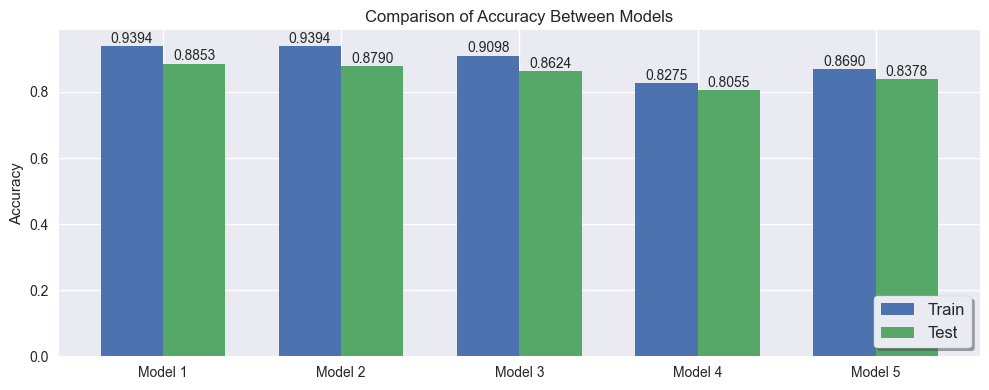

In [58]:
# Models
print("\n*******\n")
print("Model 1: NLTK + TF-IDF + LR")
print("Model 2: SpaCy + TF-IDF + LR")
print("Model 3: SpaCy + TF-IDF + LGBM")
print("Model 4: SpaCy + TF-IDF + Random Forest")
print("Model 5: SpaCy + TF-IDF + Grid Search")
print("\n*******\n")

# Plot size
plt.figure(figsize=(10, 4))

# Index
ind = np.arange(len(models))
width = 0.35

# Bars definition
bars_train = plt.bar(ind - width/2, accuracy_train, width, label='Train')
bars_test = plt.bar(ind + width/2, accuracy_test, width, label='Test')

# F1 values
for bar, acc_train in zip(bars_train, accuracy_train):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{acc_train:.4f}', ha='center', va='baseline')

for bar, acc_test in zip(bars_test, accuracy_test):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{acc_test:.4f}', ha='center', va='baseline')

# Labels
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Between Models')

plt.xticks(ind, models)
plt.legend(loc='lower right', fontsize='large', frameon=True, fancybox=True, shadow=True)

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
<b>Results:</b><br>    
▶ Model 1 and 2 (LR) achieve the highest overall accuracy in training (around 94%).<br>
▶ They are followed by Model 3 (LGBM) and Model 5 (Grid Search) with slightly lower accuracy.<br>
▶ Model 4 (Random Forest) shows the lowest accuracy in both stages (training and test).<br>

<b>Model 1 has the best performance in terms of Accuracy on the test set, with a value of 0.8850. This indicates that, on average, Model 1 correctly classifies 88.50% of the instances in the test set.</b>
</div>


### F1-score Analysis

<div style="color: #196CC4;">
<b>Definition of F1-score:</b> <br>
It is a measure that seeks to find a balance between precision and recall, the latter defined as the proportion of actual positives that are correctly identified by the model. The ideal F1-score is 1.0, indicating that the model has a good balance between precision and recall, meaning the model is able to correctly identify both positive and negative instances.<br>
</div>


*******

Model 1: NLTK + TF-IDF + LR
Model 2: SpaCy + TF-IDF + LR
Model 3: SpaCy + TF-IDF + LGBM
Model 4: SpaCy + TF-IDF + Random Forest
Model 5: SpaCy + TF-IDF + Grid Search

*******



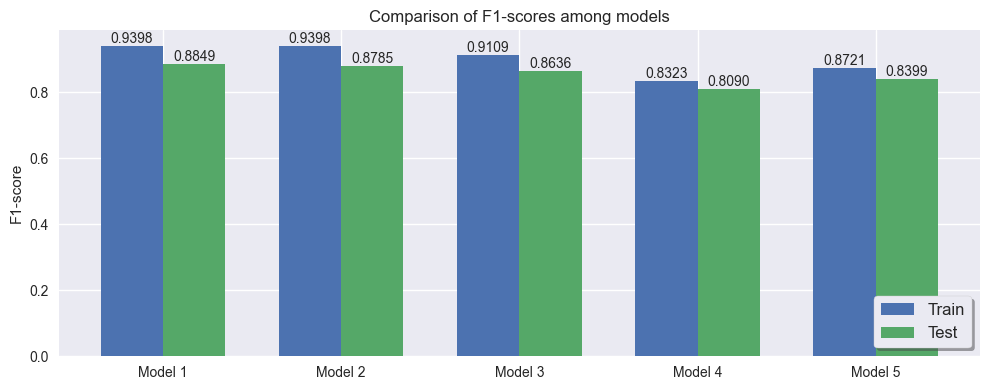

In [59]:
# Models
print("\n*******\n")
print("Model 1: NLTK + TF-IDF + LR")
print("Model 2: SpaCy + TF-IDF + LR")
print("Model 3: SpaCy + TF-IDF + LGBM")
print("Model 4: SpaCy + TF-IDF + Random Forest")
print("Model 5: SpaCy + TF-IDF + Grid Search")
print("\n*******\n")

# Plot size
plt.figure(figsize=(10, 4))

# Index
ind = np.arange(len(models))
width = 0.35

# Bars definition
bars_train = plt.bar(ind - width/2, f1_train, width, label='Train')
bars_test = plt.bar(ind + width/2, f1_test, width, label='Test')

# F1 values
for bar, f1 in zip(bars_train, f1_train):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{f1:.4f}', ha='center', va='baseline')

for bar, f1 in zip(bars_test, f1_test):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{f1:.4f}', ha='center', va='baseline')

# Labels
plt.ylabel('F1-score')
plt.title('Comparison of F1-scores among models')
plt.xticks(ind, models)
plt.legend(loc='lower right', fontsize='large', frameon=True, fancybox=True, shadow=True)

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
<b>Results:</b><br>
▶ Similar to overall accuracy, Models 1 and 2 (LR) achieve the highest F1-scores in training.<br>
▶ Model 3 (LGBM) and Model 5 (Grid Search) follow closely.<br>
▶ Model 4 (Random Forest) again has the lowest F1-scores.<br>

<b>Model 1 also leads in terms of F1-score on the test set, with a value of 0.8847. This suggests that Model 1 has a good balance between precision and recall, which is crucial in classification problems where maximizing both metrics is desired.
</b>
</div>

### ROC AUC analysis

<div style="color: #196CC4;">
<b>Definition of ROC AUC:</b> <br>
It is a measure that evaluates how well a model can distinguish between two different classes. The higher the ROC AUC value, the better the model is at discriminating between the classes, indicating that the model has a good ability to discriminate between positive and negative classes. It is a useful metric when looking for a model that can separate the classes with high confidence.<br>
</div>


*******

Model 1: NLTK + TF-IDF + LR
Model 2: SpaCy + TF-IDF + LR
Model 3: SpaCy + TF-IDF + LGBM
Model 4: SpaCy + TF-IDF + Random Forest
Model 5: SpaCy + TF-IDF + Grid Search

*******



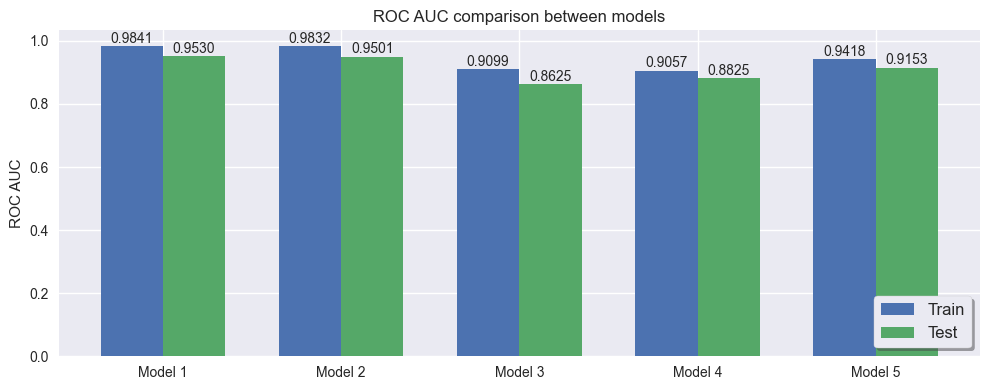

In [60]:
# Models
print("\n*******\n")
print("Model 1: NLTK + TF-IDF + LR")
print("Model 2: SpaCy + TF-IDF + LR")
print("Model 3: SpaCy + TF-IDF + LGBM")
print("Model 4: SpaCy + TF-IDF + Random Forest")
print("Model 5: SpaCy + TF-IDF + Grid Search")
print("\n*******\n")

# Plot size
plt.figure(figsize=(10, 4))

# Index
ind = np.arange(len(models))
width = 0.35

# Bars definition
bars_train = plt.bar(ind - width/2, roc_auc_train, width, label='Train')
bars_test = plt.bar(ind + width/2, roc_auc_test, width, label='Test')

# F1 values
for bar, rocauc_train in zip(bars_train, roc_auc_train):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{rocauc_train:.4f}', ha='center', va='baseline')

for bar, rocauc_test in zip(bars_test, roc_auc_test):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{rocauc_test:.4f}', ha='center', va='baseline')

# Labels
plt.ylabel('ROC AUC')
plt.title('ROC AUC comparison between models')
plt.xticks(ind, models)
plt.legend(loc='lower right', fontsize='large', frameon=True, fancybox=True, shadow=True)

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
<b>Results:</b> 

▶ Model 1 (LR) achieved the highest ROC AUC during training, followed closely by models 2 (LR) and 5 (Grid Search).<br>
▶ Model 3 (LGBM) had the lowest ROC AUC in training.<br>
   

<b>Model 1 (NLTK + LR) and Model 2 (SpaCy + LR) demonstrated the best performance, with ROC AUC scores of 0.9529 and 0.9502 respectively. These models exhibited an exceptional ability to discriminate between the positive and negative classes,</b>    
</div>

-----

## Sentiment analysis on my reviews

<div style="color: #196CC4;">
▶ This section focuses on applying sentiment analysis to English movie reviews. By employing a dataset of diverse reviews, we aim to evaluate and compare the performance of our pre-trained machine learning models.

▶ The reviews encompass a wide spectrum of sentiments, from positive to negative. Through this analysis, we will assess the models' ability to accurately classify sentiments and gain insights into their natural language processing capabilities.
</div>

In [61]:
# Reviews in english
my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

# Reviews in spanish
#my_reviews = pd.DataFrame([
#    'Simplemente no me gustó, no es mi tipo de película.',
#    'Bueno, estaba aburrido y me quedé dormido a media película.',
#    'Estaba realmente fascinada con la película',    
#    'Hasta los actores parecían muy viejos y desinteresados, y les pagaron por estar en la película. Qué robo tan desalmado.',
#    '¡No esperaba que el relanzamiento fuera tan bueno! Los escritores realmente se preocuparon por el material original',
#    'La película tuvo sus altibajos, pero siento que, en general, es una película decente. Sí la volvería a ver',
#    'Qué pésimo intento de comedia. Ni una sola broma tiene sentido, todos actúan de forma irritante y ruidosa, ¡ni siquiera a los niños les gustará esto!',
#    'Fue muy valiente el lanzamiento en Netflix y realmente aprecio poder seguir viendo episodio tras episodio de este nuevo drama tan emocionante e inteligente.'
#], columns=['review'])

### Normalization

<div style="color: #196CC4;">
▶ Next, we take the original reviews in the 'review' column and apply text preprocessing to each one using the preprocess_text function.
</div>

In [62]:
# Apply preprocessing to reviews
my_reviews['review_norm'] = my_reviews['review'].apply(preprocess_text)

# Print
my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didnt expect the reboot to be so good writer...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i really...


### Model 1

<div style="color: #196CC4;">
<b>Model 1: NLTK + TF-IDF + LR</b><br>
▶ Leveraging NLTK for text preprocessing and TF-IDF for feature extraction, Model 1 employs a Logistic Regression classifier for sentiment prediction.
</div>

In [64]:
# Select normalized text
texts = my_reviews['review_norm']

# Predict
pred_prob_model1 = model1.predict_proba(vectorizer1.transform(texts))[:, 1]

# Title
print("\n*******\n")
print('Sentiment Predictions for Model 1: NLTK + TF-IDF + LR')
print("\n*******\n")

# Loop through each review
for i, review in enumerate(texts.str.slice(0, 100)):
    
    # Predicted probability (2 decimals)
    print(f'{pred_prob_model1[i]:.2f}:  {review}')


*******

Sentiment Predictions for Model 1: NLTK + TF-IDF + LR

*******

0.16:  i did not simply like it not my kind of movie
0.17:  well i was bored and felt asleep in the middle of the movie
0.56:  i was really fascinated with the movie
0.13:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.25:  i didnt expect the reboot to be so good writers really cared about the source material
0.47:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.05:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.84:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Model 2

<div style="color: #196CC4;">
<b>Model 2: SpaCy + TF-IDF + LR</b><br>
▶ Leveraging SpaCy for natural language processing, Model 2 employs TF-IDF for feature extraction and a logistic regression classifier for sentiment classification.  </div>

In [65]:
# Select normalized text
texts = my_reviews['review_norm']

# Predict
pred_prob_model2 = model2.predict_proba(vectorizer2.transform(texts.apply(preprocess_text)))[:, 1]

# Title
print("\n*******\n")
print("Sentiment Predictions for Model 2: SpaCy + TF-IDF + LR")
print("\n*******\n")

# Loop through each review
for i, review in enumerate(texts.str.slice(0, 100)):
    
    # Predicted probability (2 decimals)
    print(f'{pred_prob_model2[i]:.2f}:  {review}')


*******

Sentiment Predictions for Model 2: SpaCy + TF-IDF + LR

*******

0.13:  i did not simply like it not my kind of movie
0.06:  well i was bored and felt asleep in the middle of the movie
0.57:  i was really fascinated with the movie
0.17:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.28:  i didnt expect the reboot to be so good writers really cared about the source material
0.38:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.03:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.87:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Model 3

<div style="color: #196CC4;">
<b>Model 3: SpaCy + TF-IDF + LGBM</b><br>
▶ Leveraging SpaCy for natural language processing, Model 3 utilizes TF-IDF for feature extraction and a LightGBM classifier for sentiment classification.  </div>

In [66]:
# Select normalized text
texts = my_reviews['review_norm']

# Predict
predictions3 = model3.predict(vectorizer2.transform(texts.apply(preprocess_text)))

# Convert predictions to probabilities using decision threshold
pred_prob_model3 = (predictions3 > 0.5).astype(float)

# Title
print("\n*******\n")
print("Sentiment Predictions for Model 3: SpaCy + TF-IDF + LGBM")
print("\n*******\n")

# Loop through each review
for i, review in enumerate(texts.str.slice(0, 100)):
    
    # Predicted probability (2 decimals)
    print(f'{pred_prob_model3[i]:.2f}:  {review}')


*******

Sentiment Predictions for Model 3: SpaCy + TF-IDF + LGBM

*******

1.00:  i did not simply like it not my kind of movie
0.00:  well i was bored and felt asleep in the middle of the movie
1.00:  i was really fascinated with the movie
0.00:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
1.00:  i didnt expect the reboot to be so good writers really cared about the source material
1.00:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.00:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
1.00:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Model 4

<div style="color: #196CC4;">
<b>Model 4: SpaCy + TF-IDF + Random Forest</b><br>
▶ Leveraging SpaCy for natural language processing, Model 4 employs TF-IDF for feature extraction and a Random Forest classifier for sentiment classification.  </div>

In [67]:
# Select normalized text
texts = my_reviews['review_norm']

# Predict
pred_prob_model4 = model4.predict_proba(vectorizer2.transform(texts.apply(preprocess_text)))[:, 1]

# Title
print("\n*******\n")
print("Sentiment Predictions for Model 4: SpaCy + TF-IDF + Random Forest")
print("\n*******\n")

# Loop through each review
for i, review in enumerate(texts.str.slice(0, 100)):
    
    # Predicted probability (2 decimals)
    print(f'{pred_prob_model4[i]:.2f}:  {review}')


*******

Sentiment Predictions for Model 4: SpaCy + TF-IDF + Random Forest

*******

0.50:  i did not simply like it not my kind of movie
0.49:  well i was bored and felt asleep in the middle of the movie
0.50:  i was really fascinated with the movie
0.50:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.51:  i didnt expect the reboot to be so good writers really cared about the source material
0.49:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.48:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.51:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Model 5

<div style="color: #196CC4;">
<b>Model 5: SpaCy + TF-IDF + Grid Search</b><br>
▶ Leveraging SpaCy for natural language processing, Model 5 utilizes TF-IDF for feature extraction and Grid Search to optimize hyperparameters for improved sentiment classification.  </div>

In [68]:
# Select normalized text
texts = my_reviews['review_norm']

# Predict
pred_prob_model5 = best_model.predict_proba(vectorizer2.transform(texts.apply(preprocess_text)))[:, 1]

# Title
print("\n*******\n")
print("Sentiment Predictions for Model 5: SpaCy + TF-IDF + Grid Search")
print("\n*******\n")

# Loop through each review
for i, review in enumerate(texts.str.slice(0, 100)):
    
    # Predicted probability (2 decimals)
    print(f'{pred_prob_model5[i]:.2f}:  {review}')


*******

Sentiment Predictions for Model 5: SpaCy + TF-IDF + Grid Search

*******

0.50:  i did not simply like it not my kind of movie
0.49:  well i was bored and felt asleep in the middle of the movie
0.51:  i was really fascinated with the movie
0.50:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.51:  i didnt expect the reboot to be so good writers really cared about the source material
0.49:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.49:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.51:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Models Summary

<div style="color: #196CC4;">
<b>Summary of Trained Sentiment Analysis Models</b><br>
▶ Model 1: NLTK + TF-IDF + Logistic Regression<br>
▶ Model 2: SpaCy + TF-IDF + Logistic Regression<br>
▶ Model 3: SpaCy + TF-IDF + LightGBM<br>
▶ Model 4: SpaCy + TF-IDF + Random Forest<br>
▶ Model 5: SpaCy + TF-IDF + Grid Search<br>
</div>

In [69]:
# Print DataFrame
all_stats

Model 1         Model 2         Model 3         Model 4          \
           Train    Test   Train    Test   Train    Test   Train    Test   
Accuracy  0.9394  0.8853  0.9394  0.8790  0.9098  0.8624  0.8275  0.8055   
F1        0.9398  0.8849  0.9398  0.8785  0.9109  0.8636  0.8323  0.8090   
ROC AUC   0.9841  0.9530  0.9832  0.9501  0.9099  0.8625  0.9057  0.8825   

         Model 5          
           Train    Test  
Accuracy  0.8690  0.8378  
F1        0.8721  0.8399  
ROC AUC   0.9418  0.9153

### Results Analysis

<div style="color: #196CC4;">
▶ <b>Model 1: NLTK + TF-IDF + LR:</b> Sentiment predictions for Model 1 show a variety of probabilities, with values ranging from 0.05 to 0.84. This indicates that the model has some uncertainty in certain reviews but displays high confidence in others.<br>
▶ <b>Model 2: SpaCy + TF-IDF + LR: </b> Similar to Model 1, sentiment predictions for Model 2 vary between low and high probabilities, ranging from 0.03 to 0.88.<br>
▶ <b>Model 3: SpaCy + TF-IDF + LGBM:</b> Model 3's predictions show a binary classification with extreme probabilities, indicating high confidence in some reviews (probability of 0.0 or 1.0).<br>
▶ <b>Model 4: SpaCy + TF-IDF + Random Forest:</b> Model 4's predictions display a binary classification with probabilities close to 0.5 in most reviews, suggesting lower confidence in the predictions.<br>
▶ <b>Model 5: SpaCy + TF-IDF + Grid Search:</b> Model 5's predictions exhibit a binary classification with probabilities close to 0.5, similar to Model 4.<br>

<b>Summary: LR-based models (Model 1 and Model 2) appear to be the most balanced and robust for the sentiment analysis task on the previously analyzed reviews. They also tend to show better performance in terms of F1-score and ROC AUC on the test set.  </b>
</div>

-----

## Conclusions

<div style="color: #196CC4;">
<b>SENTIMENT ANALYSIS</b><br>
▶ A detailed analysis of sentiment in movie reviews using various models has provided significant insights into their performance and applicability. Considering the evaluation metrics and overall conclusions, LR-based models (Model 1 and Model 2) stand out as the most suitable for this specific task.<br>

<b>PERFORMANCE</b>  <br>
<b>Based on the criterion that the F1_Test score must be equal to or greater than 0.85 to consider a model viable, the best model is Model 1 (NLTK + TF-IDF + LR), with an F1_Test score of 0.8847.</b><br><br>
▶ This model has the highest F1 score among all the evaluated models based on the provided data. <br>
▶ Performance: The F1_Test score of 0.8847 indicates that Model 1 has a robust ability to generalize and predict accurately on unseen data. This suggests that the model can be reliable in classifying new reviews.<br>
▶ Efficiency: The use of NLTK for text normalization and TF-IDF for vector representation along with Logistic Regression as the classification model makes Model 1 relatively simple and computationally efficient.<br>

<b>SUMMARY</b>  <br>
<b>In summary, the sentiment analysis of movie reviews reveals that Model 1 is the leader in accuracy and generalization, supported by its high F1-score and effective methodological approach.     </b>
</div>